# Einführung in das Programmieren ILV
## Input Übung 8 (OOP Teil 1)
###### WS 2024/25 | Mohamed Goha, BSc.

# `Objektorientiertes Programmieren`

# **1 Motivation OOP**

In diesem Abschnitt wird eine Implementierung mit der bisher besprochenen prozeduralen Programmierung einer OOP Implementierung gegebübergestellt. Dadurch soll die Motivation mit allen Vorteilen dieses Konzeptes sichtbar gemacht werden.

Es soll ein System für die Verwaltung von Konten entwickelt werden, welches das Anlegen neuer Konten, Überweisungen sowie Ein- und Auszahlungen ermöglicht. Ziel ist es, folgende Datenstruktur als Objekt mit den entsprechenden Methoden zu implementieren:

In [1]:
account = {
    "owner" : "Hans Meier",
    "account_number" : 567123,
    "balance" : 123.0,
    "max_daily_transactions" : 1500,
    "transactions_today" : 10.0
    }

def new_account(owner, account_number, balance, max_daily_transactions=1500):
    return {
        "owner" : owner,
        "account_number" : account_number,
        "balance" : balance,
        "max_daily_transactions" : max_daily_transactions,
        "transactions_today" : 0
        }

# Method to enable basic functionality like money transfer

def money_transfer(source, target, amount):
    # Here we check if the transfer is possible
    if (amount < 0 or
        source["transactions_today"] + amount > source["max_daily_transactions"] or
        target["transactions_today"] + amount > target["max_daily_transactions"]):
        # Transfer not possible
        return False
    else:
        # Everything OK - Let's go
        source["balance"] -= amount
        source["transactions_today"] += amount
        target["balance"] += amount
        target["transactions_today"] += amount
        return True

def deposit(account, amount):
    if amount < 0 or account["transactions_today"] + amount > account["max_daily_transactions"]:
        # Daily limit exceeded or invalid amount
        return False
    else:
        account["balance"] += amount
        account["transactions_today"] += amount
        return True

def withdraw(account, amount):
    if amount < 0 or account["transactions_today"] + amount > account["max_daily_transactions"]:
        # Daily limit exceeded or invalid amount
        return False
    else:
        account["balance"] -= amount
        account["transactions_today"] += amount
        return True

# Method to query account data

def show_account(account):
    print(f"Account of {account['owner']}")
    print("Current balance: {:.2f} Euro".format(account["balance"]))
    print("(Already {:.2f} of {} Euro spent today)".format(
        account["transactions_today"], account["max_daily_transactions"]))
    
# In the main program, bank operations can now be performed

acc1 = new_account("Heinz Meier", 567123, 12350.0)
acc2 = new_account("Erwin Schmidt", 396754, 15000.0)

money_transfer(acc1, acc2, 160)
money_transfer(acc2, acc1, 1000)
money_transfer(acc2, acc1, 500)
deposit(acc2, 500)

show_account(acc1)
show_account(acc2)


Account of Heinz Meier
Current balance: 13190.00 Euro
(Already 1160.00 of 1500 Euro spent today)
Account of Erwin Schmidt
Current balance: 14160.00 Euro
(Already 1160.00 of 1500 Euro spent today)


## 1.2 Lösung mit OOP


Die Objektorientierung bietet genau die Lösungen an, die notwendig sind, um die besprochene prozedurale Implementierung klarer, übersichtlicher und besser erweiterbar zu machen. Dabei werden Daten und Funktionen zu Klassen und Objekten zusammenfasst.

Die Daten eines solchen Objekts werden Attribute und die Verarbeitungsfunktionen Methoden genannt. Attribute und Methoden werden unter dem Begriff Member einer Klasse zusammengefasst. Schematisch lässt sich das Objekt eines Kontos folgendermaßen darstellen:

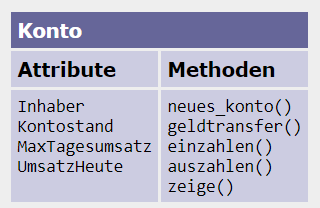



In [2]:
# The Account class includes all attributes and functionalities
# as above in procedural programming, but with the advantage of clear encapsulation and structure

class Account:
    def __init__(self, owner, account_number, balance, max_daily_transactions=1500):
        self.owner = owner
        self.account_number = account_number
        self.balance = balance
        self.max_daily_transactions = max_daily_transactions
        self.transactions_today = 0

    def money_transfer(self, target, amount):
        # Here we check if the transfer is possible
        if (amount < 0 or
                self.transactions_today + amount > self.max_daily_transactions or
                target.transactions_today + amount > target.max_daily_transactions):
            # Transfer not possible
            return False
        else:
            # All OK - Let's go
            self.balance -= amount
            self.transactions_today += amount
            target.balance += amount
            target.transactions_today += amount
            return True

    def deposit(self, amount):
        if amount < 0 or self.transactions_today + amount > self.max_daily_transactions:
            # Daily limit exceeded or invalid amount
            return False
        else:
            self.balance += amount
            self.transactions_today += amount
            return True

    def withdraw(self, amount):
        if amount < 0 or self.transactions_today + amount > self.max_daily_transactions:
            # Daily limit exceeded or invalid amount
            return False
        else:
            self.balance -= amount
            self.transactions_today += amount
            return True

    def show(self):
        print(f"Account of {self.owner}")
        print("Current balance: {:.2f} Euro".format(self.balance))
        print("(Already {:.2f} of {} Euro spent today)".format(
            self.transactions_today, self.max_daily_transactions))


In [3]:
# In the main program, instances are created

acc1 = Account("Heinz Meier", 567123, 12350.0)
acc2 = Account("Erwin Schmidt", 396754, 15000.0)

acc1.money_transfer(acc2, 160)
acc2.money_transfer(acc1, 1000)
acc2.money_transfer(acc1, 500)
acc2.deposit(500)

acc1.show()
acc2.show()


Account of Heinz Meier
Current balance: 13190.00 Euro
(Already 1160.00 of 1500 Euro spent today)
Account of Erwin Schmidt
Current balance: 14160.00 Euro
(Already 1160.00 of 1500 Euro spent today)


### `Klassendefinition und Erstellung von Instanzen/Objekten`

Wie wir schon bei dem Thema Funktionen gesehen haben, kann es Vorteile haben, Code - Abschnitte in wiederverwendbare Strukturen zu packen. Der Code kann dadurch nicht nur besser lesbar, sondern auch flexibler werden (z.B. durch variable Parameter/Argumente). 

Wenn wir objektorientiert programmieren, gruppieren wir sowohl Daten, als auch Funktionen in eine Struktur: einem "Objekt" (object). 

Ein Objekt ist eine Instanz einer Klasse. Es wird oft versucht, durch eine Klasse einen Aspekt der Welt/ein Konzept digital zu modellieren. 

Intuition: Wenn die Klasse "Mensch" existiert, dann kann eine 24-jährige Frau namens Julia als eine Instanz dieser Klasse abgebildet werden. Diese Instanz ist ein Objekt mit den Attributen (Daten) und Methoden (Funktionen), die in der Klasse definiert sind. Mögliche Attribute für die Klasse Mensch: Alter, Name, Geschlecht. Mögliche Methoden für die Klasse Mensch: atmen(), ernähren(), etc. 

Jede Instanz dieser Beispielklasse "Mensch" hat dann die genannten Attribute, aber die Werte der Attribute können verschieden sein - ein Objekt kann den Namen "Felix" haben, ein anderes den Wert 46 im Attribut "Alter". Somit haben wir verschiedene Objekte, die aber alle Instanzen der Klasse "Mensch" sind.

Wir haben schon oft mit Objekten gearbeitet. Beispielsweise ist in Python eine Variable x = 12 eine Referenz auf ein Objekt der built-in Klasse "int". Built-in Klassen werden jedoch etwas verschieden zu anderen Klassen behandelt.
 

In [4]:
class Dog:
    def __init__(self, name):
        # __init__ is called when creating a new instance of the class
        # 'self' is the first parameter of every method and gives access
        # to the instance's attributes and methods
        
        # Variables are only available within the method scope
        some_variable = 5  # Only exists in this method
        
        # Create instance attributes using self.attribute_name
        self.name = name
        
        print(f"Created {self.name}")

In [5]:
# for demonstration
dog1 = Dog(name="bello")

Created bello


In [6]:
# Creating instances of the "Dog" class involves Python's two-step object creation:
# 1. The "__new__" method creates the instance in memory
# 2. The "__init__" method initializes the instance with its attributes
# While "__init__" is commonly called a constructor, it's technically an initializer:
dog1 = Dog(name="bello")  # This creates an initialized instance of our class

# Access the instance and its attributes:
print(f"dog1: {dog1}")
print(f"dog1.name: {dog1.name}")

# Get the type/class information using the built-in "type" function:
# https://docs.python.org/3/library/functions.html#type
print(type(dog1))
print(type(dog1).__name__)

# Create another instance of our "Dog" class:
dog2 = Dog(name="barky")
print(f"dog2: {dog2}")
print(f"dog2.name: {dog2.name}")

# Demonstrate that each instance is a unique object in memory:
print(f"dog1 is dog2? answer: {dog1 is dog2}")

Created bello
dog1: <__main__.Dog object at 0x0000027AD0951C48>
dog1.name: bello
<class '__main__.Dog'>
Dog
Created barky
dog2: <__main__.Dog object at 0x0000027AD0951988>
dog2.name: barky
dog1 is dog2? answer: False


#### `Methoden hinzufügen`

In [7]:
class Dog:
    
    def __init__(self, name):
        self.name = name
    
    def communicate(self):
        communication = "bark"
        communication = f"{self.name}: {communication}"
        return communication



In [8]:
# Create instances of our new "Dog" class:
dog1 = Dog(name="bello")  # First instance
dog2 = Dog("barky")       # Second instance, demonstrating optional 'name=' syntax

# Call instance methods using dot notation:
print(dog1.communicate())  # Effectively calls: Dog.communicate(dog1)
print(dog2.communicate())

# This pattern is common in Python's built-in classes:
# - str methods: "some_string.upper()"
# - list methods: "some_list.append(...)"

bello: bark
barky: bark


### `Vererbung`

Nehmen wir an, wir möchten eine Klasse "Cat" und "Frog" hinzufügen, 
die ebenfalls ein Attribut "name" und eine Methode "communicate" haben. Allerdings 
möchten wir das Verhalten der "communicate"-Methode für "Cat" und "Frog" ändern. 

Um Code-Duplikation zu vermeiden, verwenden wir `Vererbung`, bei der wir Code in 
sogenannten Unterklassen (subclasses) wiederverwenden können, die Code von Basisklassen/Superklassen 
erben. Dies erzeugt eine Typ-/Klassenhierarchie von Basisklassen und Unterklassen. 
Im folgenden Beispiel erstellen wir diese Hierarchie:

In [9]:
#                                  Animal
#                                    ↑
#                                    │
#         ┌─────────────────┬────────┴────────┬────────────────┐
#         │                 │                 │                │
#        Frog              Bird              Dog              Cat
#         ↑                 ↑
#         │                 │
# SouthernLeopardFrog     Canary

# First, we define a base class that we call "Animal":
class Animal:
    
    def __init__(self, name):
        self.name = name
    
    def communicate(self):
        # As a generic animal, we do not really know how to communicate, this
        # should be implemented by concrete subclasses. Our "communicate" method
        # is now called an abstract method, it does not have an (actual)
        # implementation. This can be indicated by raising a NotImplementedError
        raise NotImplementedError


# Then, we can define a class "Dog" that inherits from the class "Animal". By
# doing this, we will have a class "Dog" that contains the same attributes and
# methods as the base class "Animal" does. If we want to add or modify the
# methods/attributes, we can simply override them:
class Dog(Animal):
    # We do not need a new "__init__" method since the "__init__" method from
    # the "Animal" base class already does everything what we want it to do.
    
    # Here, we override the method "communicate" by a new version:
    def communicate(self):
        return f"{self.name}: bark"


# We can do the same for the classes "Cat" and "Frog":
class Cat(Animal):
    
    def communicate(self):
        return f"{self.name}: meow"


class Frog(Animal):
    
    def communicate(self):
        return f"{self.name}: croak"

In [10]:
animal1 = Dog(name="bello")
animal2 = Cat(name="scratchy")
animal3 = Frog(name="jumper")

print(animal1.communicate())
print(animal2.communicate())
print(animal3.communicate())

bello: bark
scratchy: meow
jumper: croak


In [11]:
# Multiple inheritance
class SouthernLeopardFrog(Frog):
    
    def communicate(self):
        return f"{self.name}: screech"


animal4 = SouthernLeopardFrog(name="froggy")
print(animal4.communicate())

froggy: screech


In [12]:
# We can also add new methods when deriving from a class:
class Bird(Animal):
    
    def communicate(self):
        return f"{self.name}: peep"
    
    # Here, we add a new method "fly" including a user-specifiable parameter
    # (again "self" must be the first (implicitly set) parameter):
    def fly(self, distance):
        return f"{self.name} flew {distance}km!"


animal5 = Bird(name="peeps")
print(animal5.communicate())
print(animal5.fly(500))


# We can also choose not to override anything if we are already satisfied with
# the implementation in the superclass. If we do not override, simply the first
# found implementation will be used when going upwards the class hierarchy:
class Canary(Bird):
    
    def communicate(self):
        return f"{self.name}: *sings song*"
    
    # "fly" method of superclass is already satisfactory

peeps: peep
peeps flew 500km!


In [13]:
animal6 = Canary(name="Joe")
# Uses the first found implementation of "fly" when going upwards the class
# hierarchy, which is the implementation in class "Bird":
print(animal6.fly(10))

Joe flew 10km!
